In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

In [3]:
sys.path.append("C:\\Users\\Sectorea\\Code\\etl")

EXTRACTION OF INFO, TOKENS HAVE BEEN PREVIOUSLY NORMALIZED

In [73]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [74]:
X = iris.drop(columns=["species"])
y = iris.species

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.5, random_state=5, stratify=y
)

In [77]:
from pydrift import DataDriftChecker

In [78]:
data_drift_checker_ok = DataDriftChecker(X_train, X_test)

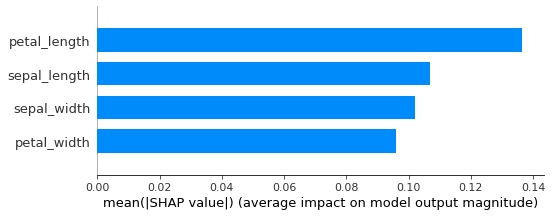

No drift found in discriminative model step

AUC drift check model: 0.56
AUC threshold: .5 ± 0.10


In [79]:
data_drift_checker_ok.ml_model_can_discriminate();

In [80]:
data_drift_checker_ok.check_numerical_columns();

No drift found in numerical columns check step



In [81]:
data_drift_checker_ok.check_categorical_columns();

No drift found in categorical columns check step



In [85]:
X["color"] = X["petal_length"].apply(lambda x: "blue" if x > 1.3 else "red")

In [87]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width,color
0,5.1,3.5,1.4,0.2,blue
1,4.9,3.0,1.4,0.2,blue
2,4.7,3.2,1.3,0.2,red
3,4.6,3.1,1.5,0.2,blue
4,5.0,3.6,1.4,0.2,blue


In [88]:
X_red = X[X['color'] == 'red']
X_blue = X[X['color'] == 'blue']

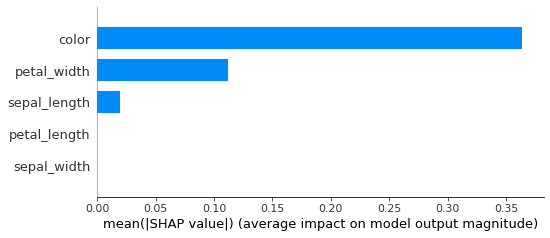

Drift found in discriminative model step, take a look on the most discriminative features (plots when minimal is set to False)

AUC drift check model: 1.00
AUC threshold: .5 ± 0.10


In [89]:
data_drift_checker_ko = DataDriftChecker(X_red, X_blue)
data_drift_checker_ko.ml_model_can_discriminate();

In [90]:
data_drift_checker_ko.check_numerical_columns();

Drift found in numerical columns check step, take a look on the variables that are drifted, if one is not important you could simply delete it, otherwise check the data source



C:\Users\Sectorea\Code\etl\src\python\.etl\lib\site-packages\pydrift\core\drift_checker.py:387: UserWarning:

Features drifted (numerical): sepal_length, petal_length, petal_width



In [91]:
data_drift_checker_ko.check_categorical_columns();

Drift found in categorical columns check step, take a look on the variables that are drifted, if one is not important you could simply delete it, otherwise check the data source



C:\Users\Sectorea\Code\etl\src\python\.etl\lib\site-packages\pydrift\core\drift_checker.py:477: UserWarning:

Features drifted (categorical): color



In [92]:
data_drift_checker_ko.drifted_features

{'color', 'petal_length', 'petal_width', 'sepal_length'}